Лабораторная работа №2 "Классификация с помощью логистической регрессии"

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. Загрузить данные из файла heart.csv, используя функцию read_csv() библиотеки pandas.  Более подробная информация о датасете https://www.kaggle.com/fedesoriano/heart-failure-prediction

In [17]:
df = pd.read_csv('heart.csv')

In [18]:
df

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

2. Проверить сбалансированность выборки (Сколько объектов класса "1" и "0" соответственно). Можно воспользоваться методом value_counts()

In [19]:
counts = df["HeartDisease"].value_counts()
for i in counts.index:
    print(f"Class {i}: {counts.loc[i]}")

Class 1: 508
Class 0: 410


3. Выделить качественные признаки, провести их кодирование. Для этого можно воспользоваться фунцией get_dummies() библиотеки pandas

In [20]:
encoding = {"Sex": {"M": 1, "F": 0},
            "ChestPainType": {"ASY": 0, "ATA": 1, "NAP": 2, "TA": 3},
            "RestingECG": {"LVH": 0, "Normal": 1, "ST": 2},
            "ExerciseAngina": {"N": 0, "Y": 1},
            "ST_Slope": {"Down": 0, "Flat": 1, "Up": 2}}
df_enc = df.replace(encoding)
df_enc

/var/folders/1f/qzsxtjvd1hgcnxb8nykmnbz00000gn/T/ipykernel_3097/1978302751.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_enc = df.replace(encoding)


Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140          289          0           1   
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3        110          264          0           1   
914   68    1              0        144          193          1           1   
915   57    1              0        130          131          0           1   
916   57    0              1        130          236          0           0   
917   38    1              2        138          175          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0      172               0      0.0         2             0  
1      156               0      1.0         1             1  
2       98               0      0.0         2             0  
3      108               1      1.5         1             1  
4      122               0      0.0         2             0  
..     ...             ...      ...       ...           ...  
913    132               0      1.2         1             1  
914    141               0      3.4         1             1  
915    115               1      1.2         1             1  
916    174               0      0.0         1             1  
917    173               0      0.0         2             0  

[918 rows x 12 columns]

4. Провести нормирование всех количественных признаков. В данном случае, чтобы не изменились значения кодированных качественных признаков можно использовать класс MinMaxScaler(), либо способ из прошлой работы. Отделить входные данные от разметки.

In [21]:
def normalization(X):
    return (X - X.mean()) / X.std()

In [22]:
# from sklearn.preprocessing import MinMaxScaler
X_norm = normalization(df_enc.drop("HeartDisease", axis=1))
X_norm

Age       Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0   -1.432359  0.515671       0.228907   0.410685     0.824621  -0.551041   
1   -0.478223 -1.937107       1.274364   1.490940    -0.171867  -0.551041   
2   -1.750404  0.515671       0.228907  -0.129442     0.769768  -0.551041   
3   -0.584238 -1.937107      -0.816550   0.302660     0.138964  -0.551041   
4    0.051853  0.515671       1.274364   0.950812    -0.034736  -0.551041   
..        ...       ...            ...        ...          ...        ...   
913 -0.902283  0.515671       2.319822  -1.209697     0.596068  -0.551041   
914  1.536064  0.515671      -0.816550   0.626736    -0.053020   1.812770   
915  0.369898  0.515671      -0.816550  -0.129442    -0.619830  -0.551041   
916  0.369898 -1.937107       0.228907  -0.129442     0.340090  -0.551041   
917 -1.644389  0.515671       1.274364   0.302660    -0.217578  -0.551041   

     RestingECG     MaxHR  ExerciseAngina   Oldpeak  ST_Slope  
0      0.017245  1.382175       -0.823108 -0.831979  1.051541  
1      0.017245  0.753746       -0.823108  0.105606 -0.595753  
2      1.600347 -1.524307       -0.823108 -0.831979  1.051541  
3      0.017245 -1.131539        1.213585  0.574398 -0.595753  
4      0.017245 -0.581664       -0.823108 -0.831979  1.051541  
..          ...       ...             ...       ...       ...  
913    0.017245 -0.188897       -0.823108  0.293123 -0.595753  
914    0.017245  0.164595       -0.823108  2.355810 -0.595753  
915    0.017245 -0.856602        1.213585  0.293123 -0.595753  
916   -1.565856  1.460728       -0.823108 -0.831979 -0.595753  
917    0.017245  1.421452       -0.823108 -0.831979  1.051541  

[918 rows x 11 columns]

In [23]:
Y = df_enc.HeartDisease
Y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

5. Разделить выборку на обучающую и тестовую в соотношении 0.6:0.2:0.2, используя функцию train_test_split(). Параметр рандомизации задать random_state = 13 для возможности сравнения результатов. Проверить сбалансированность классов в полученных выборках.

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y, train_size=0.6, random_state=13)
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, train_size=0.5, random_state=13)

def print_count(series):
    counts = series.value_counts()
    for i in counts.index:
        print(f"Class {i}: {counts.loc[i]}")

print("Train:")
print_count(Y_train)
print("Validate:")
print_count(Y_val)
print("Test:")
print_count(Y_test)

Train:
Class 1: 302
Class 0: 248
Validate:
Class 1: 110
Class 0: 74
Test:
Class 1: 96
Class 0: 88


In [25]:
X_train.shape, X_test.shape

((550, 11), (184, 11))

6. Обучить классификатор на основе логистической регрессии. Использовать класс по вариантам: 1 - LogisticRegression; 2 - SGDClassifier. Процедуру регуляризации не проводить. Рассчитать предсказанные значения классов для тестовой выборки.

In [26]:
# 1
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
Y_test_pred_lr = log_reg.predict(X_test)

# 2
from sklearn.linear_model import SGDClassifier
sgd_class = SGDClassifier()
sgd_class.fit(X_train, Y_train)
Y_test_pred_sgd = sgd_class.predict(X_test)


7. Рассчитать точность классификации, в качестве метрики использовать долю верных ответов модели с реальными заначениями.

In [27]:
from sklearn.metrics import accuracy_score
print(f"Test accuracy for logistic regression: {round(accuracy_score(Y_test, Y_test_pred_lr), 3)}")
print(f"Test accuracy for stochastic gradient descent: {round(accuracy_score(Y_test, Y_test_pred_sgd), 3)}")

Test accuracy for logistic regression: 0.81
Test accuracy for stochastic gradient descent: 0.832


8. Для заданного в диапазоне $[0, 0.001, 0.01, 0.1, 1.0, 10]$ параметра регуляризации провести процедуру валидации, выбрать оптимальное значение гиперпараметра. Обучить модель при этом значении и рассчитать точность. Для обучения также использовать классы  LogisticRegression или SGDClassifier

In [28]:
lamb = [0.001, 0.01, 0.1, 1.0, 10] 

best_model_lr = None
best_model_sgd = None
best_acc_val_lr = None
best_acc_val_sgd = None
best_lamd_lr = None
best_lamd_sgd = None
for l in lamb:
    lr_model = LogisticRegression(C=l)
    lr_model.fit(X_train, Y_train)
    Y_val_pred_lr = lr_model.predict(X_val)
    acc_lr = accuracy_score(Y_val, Y_val_pred_lr)
    print(f"Accuracy of logistic regression model for lambda {l}: {round(acc_lr, 3)}")
    if best_acc_val_lr is None:
        best_acc_val_lr = acc_lr
        best_lamd_lr = l
    elif acc_lr > best_acc_val_lr:
        best_acc_val_lr = acc_lr
        best_lamd_lr = l

best_model_lr = LogisticRegression(C=best_lamd_lr)
best_model_lr.fit(X_train, Y_train)
Y_test_pred_best_lr = best_model_lr.predict(X_test)
test_acc_best_lr = accuracy_score(Y_test, Y_test_pred_best_lr)
print(f"Best lambda for logistic regression model is {best_lamd_lr} with accuracy: {round(best_acc_val_lr, 3)}")
print(f"Test accuracy: {round(test_acc_best_lr, 3)}")

print("-"*100)

for l in lamb:
    sgd_model = SGDClassifier(alpha=l)
    sgd_model.fit(X_train, Y_train)
    Y_val_pred_sgd = sgd_model.predict(X_val)
    acc_sgd = accuracy_score(Y_val, Y_val_pred_sgd)
    print(f"Accuracy of stochastic gradient descent model for lambda {l}: {round(acc_sgd, 3)}")
    if best_acc_val_sgd is None:
        best_acc_val_sgd = acc_sgd
        best_lamd_sgd = l
    elif acc_sgd > best_acc_val_sgd:
        best_acc_val_sgd = acc_sgd
        best_lamd_sgd = l

best_model_sgd = SGDClassifier(alpha=best_lamd_sgd)
best_model_sgd.fit(X_train, Y_train)
Y_test_pred_best_sgd = best_model_sgd.predict(X_test)
test_acc_best_sgd = accuracy_score(Y_test, Y_test_pred_best_sgd)
print(f"Best lambda for stochastic gradient descent model is {best_lamd_sgd} with accuracy: {round(best_acc_val_sgd, 3)}")
print(f"Test accuracy: {round(test_acc_best_sgd, 3)}")

Accuracy of logistic regression model for lambda 0.001: 0.815
Accuracy of logistic regression model for lambda 0.01: 0.886
Accuracy of logistic regression model for lambda 0.1: 0.886
Accuracy of logistic regression model for lambda 1.0: 0.891
Accuracy of logistic regression model for lambda 10: 0.886
Best lambda for logistic regression model is 1.0 with accuracy: 0.891
Test accuracy: 0.81
----------------------------------------------------------------------------------------------------
Accuracy of stochastic gradient descent model for lambda 0.001: 0.842
Accuracy of stochastic gradient descent model for lambda 0.01: 0.88
Accuracy of stochastic gradient descent model for lambda 0.1: 0.886
Accuracy of stochastic gradient descent model for lambda 1.0: 0.87
Accuracy of stochastic gradient descent model for lambda 10: 0.598
Best lambda for stochastic gradient descent model is 0.1 with accuracy: 0.886
Test accuracy: 0.853


9. Для лучшей модели изобразить матрицу ошибок (confusion matrix)

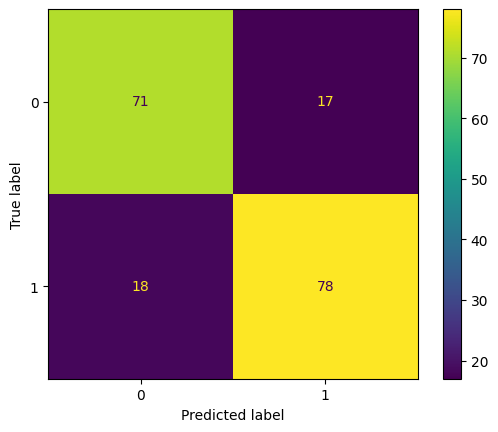

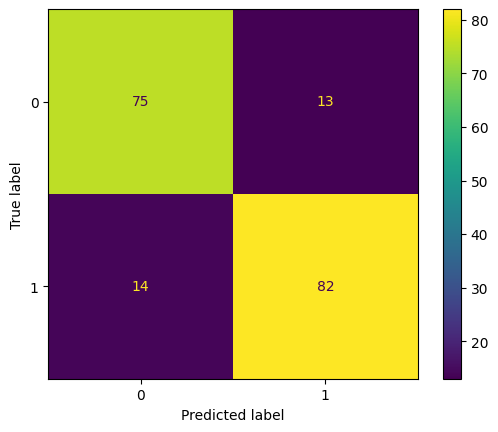

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm_lr = confusion_matrix(Y_test, Y_test_pred_best_lr)
ConfusionMatrixDisplay(cm_lr).plot()

cm_sgd = confusion_matrix(Y_test, Y_test_pred_best_sgd)
ConfusionMatrixDisplay(cm_sgd).plot()

plt.show()

10. Обучить модель, используя процедуру кросс-валидации с помощью класса LogisticRegressionCV. Предварительно нужно объединить тренировочную и валидационную выборку. Оценить точность модели.

In [30]:
from sklearn.linear_model import LogisticRegressionCV
X_merged = pd.concat([X_train, X_val])
Y_merged = pd.concat([Y_train, Y_val])
log_reg_cv = LogisticRegressionCV(Cs=lamb)
log_reg_cv.fit(X_merged, Y_merged)
Y_pred_cv_pr = log_reg_cv.predict_proba(X_test)
Y_pred_cv = [0 if x[0] > x[1] else 1 for x in Y_pred_cv_pr]
print(f"Accuracy for linear regression model with cross-validation is: {round(accuracy_score(Y_test, Y_pred_cv), 3)}")

Accuracy for linear regression model with cross-validation is: 0.826


11. Для оценки точности построить ROC-кривую. Для этого рассчитать предсказанные вероятности по последней модели. Рассчитать значения оценок FPR и TPR с помощью функции roc_curve().

In [31]:
Y_pred_cv_pr_1 = [Y_pred_cv_pr[x][1] for x in range(len(Y_pred_cv_pr))]

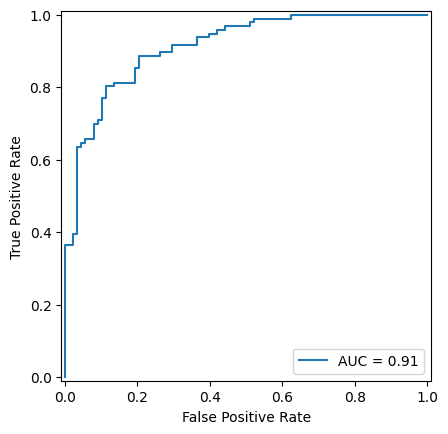

In [32]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_cv_pr_1)
auc = roc_auc_score(Y_test, Y_pred_cv_pr_1)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc).plot()
plt.show()